# Face detection using opencv.

## Image reading, displaying and saving. 


In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Need to import cv2 which is a 2nd version of opencv
import cv2

In [3]:
#This command reads the image and returns it in a variable.
input = cv2.imread('Datasets\opencv_images\cillian_murphy_1.jpg')

In [4]:
#This command shows the image in an python image viewer.
cv2.imshow('Cillian_Murphy', input)
cv2.waitKey(0)

-1

In [5]:
cv2.destroyAllWindows

<function destroyAllWindows>

In [6]:
#Now lets print the color codes of the image to give a broader idea about the image.
print(input.shape)

(657, 763, 3)


In [12]:
#this will create the same image and save it with a different name.
cv2.imwrite('output.jpg', input)

True

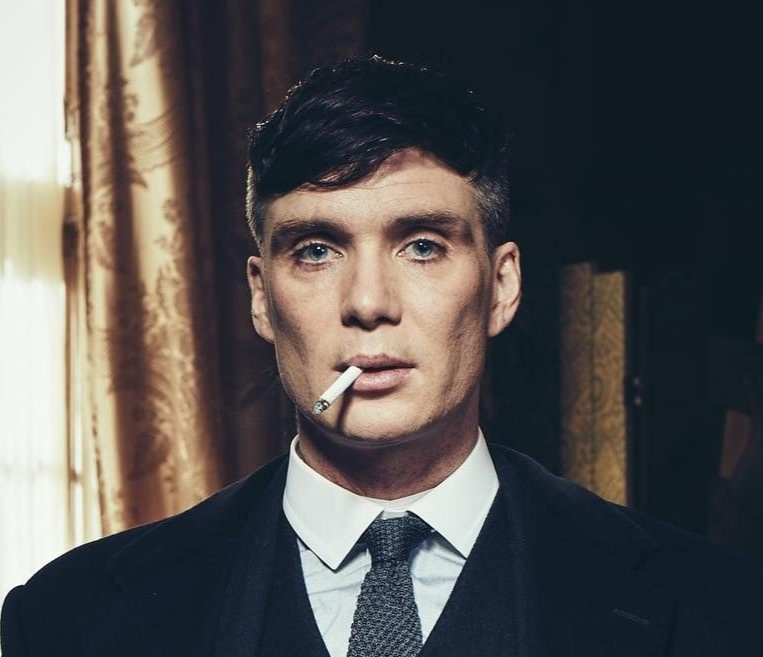

## Face detection


##### In opencv there are some .xml files built in which we can easily find bounding boxes around the required textures on an input image.
##### These .xml files basically are templates for face/eye/car etc detection, we can easily find these and download from their official github repo.

In [8]:
cat_face_classifier = cv2.CascadeClassifier('OpenCV Documents\haarcascades\haarcascade_frontalface_default.xml')
#Now our variable classifer learns about a face, its texture, etc.

image = cv2.imread('Datasets\opencv_images\cillian_murphy_1.jpg')

cv2.imshow('Cillian Murphy',image)
cv2.waitKey(0)

#We need to convert our RGB image to a Grayscale image to make it easy and efficient
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#our Classifier returns the ROI of the detected face as a tuple
#It stores the top left coordinates as (x,y) and the bottom right coordinates as (w,h)
faces = cat_face_classifier.detectMultiScale(gray, 1.3, 5)

#If no face has been detected
if faces is ():
    print("No faces Detected")
    
# we iterate through our faces, array and draw a rectangle(bounding box) over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 10)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()
roi_gray = gray[y:y+h, x:x+w]
roi_color = image[y:y+h, x:x+w]

<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\yashm\AppData\Local\Temp\ipykernel_18848\185325785.py:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [9]:
cv2.imwrite('output.jpg', roi_color)

True

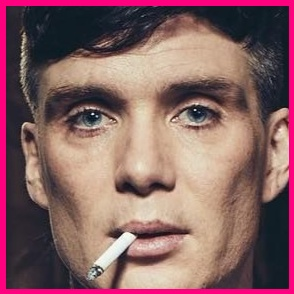

## Let's combine Face and Eye detection


In [10]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('OpenCV Documents\haarcascades\haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('OpenCV Documents\haarcascades\haarcascade_eye.xml')
 
img = cv2.imread('Datasets\opencv_images\cillian_murphy_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# # When no faces detected, face_classifier returns an empty tuple
# if faces is ():
#     print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),20)
    cv2.imshow('img',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),6)
        cv2.imshow('img',img)
        cv2.waitKey(0)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
    
cv2.destroyAllWindows()

In [11]:
cv2.imwrite('output.jpg', roi_color)

True

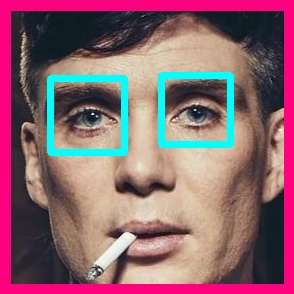

##### Successfully executed!!!